In [1]:
import fastai

In [2]:
from fastai.vision import *

In [3]:

img_size = 512

#path = '/opt/AIStorage/PLAYGROUND/images/' + str(img_size) + '/'

path = '/opt/AIStorage/PLAYGROUND/images/512/filtered/data_filtered/'


data = ImageDataBunch.from_folder(path, valid_pct=0.2, size=img_size, bs=16, ds_tfms=(rand_pad(2, img_size), []))


#data = ImageDataBunch.from_folder(path,valid='validation', size=img_size, bs=16, ds_tfms=(rand_pad(2, img_size), []))


epochs=12

#arch = models.densenet121

#arch = models.densenet169

#arch = models.densenet201

arch = models.vgg19_bn

    
    

In [4]:
#learn = cnn_learner(data, arch, metrics=accuracy, bn_final=True, pretrained=False).to_fp16()
#learn.unfreeze()
#learn = cnn_learner(data, arch, metrics=accuracy, bn_final=True).to_fp16()
learn = cnn_learner(data, arch, metrics=accuracy, bn_final=True)
#learn = cnn_learner(data, arch, metrics=accuracy, opt_func=optim.SGD)

In [5]:
#learn.lr_find()
#learn.recorder.plot()

In [6]:
learn.model = nn.DataParallel(learn.model)
learn.fit_one_cycle(epochs)

epoch,train_loss,valid_loss,accuracy,time
0,0.601513,0.561216,0.717659,03:36
1,0.556725,0.534435,0.738810,03:33
2,0.522950,0.497969,0.763896,03:33
3,0.495979,0.450088,0.791933,03:33
4,0.465161,0.430505,0.804230,03:33
5,0.399191,0.410446,0.808657,03:33
6,0.414343,0.407009,0.813084,03:33
7,0.392173,0.394561,0.816035,03:33
8,0.371010,0.392230,0.824397,03:33
9,0.387034,0.385177,0.823414,03:33


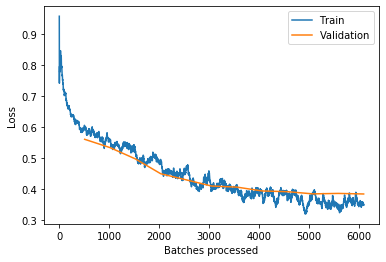

In [7]:
learn.recorder.plot_losses()

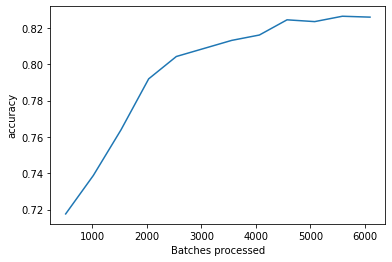

In [8]:
learn.recorder.plot_metrics()

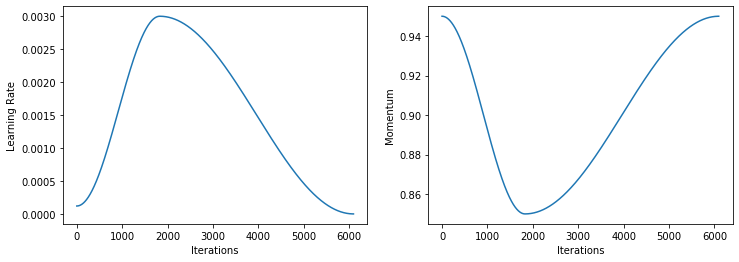

In [9]:
learn.recorder.plot_lr(show_moms=True)

In [10]:
#learn = learn.to_fp32()

In [11]:
learn.model = learn.model.module

In [12]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

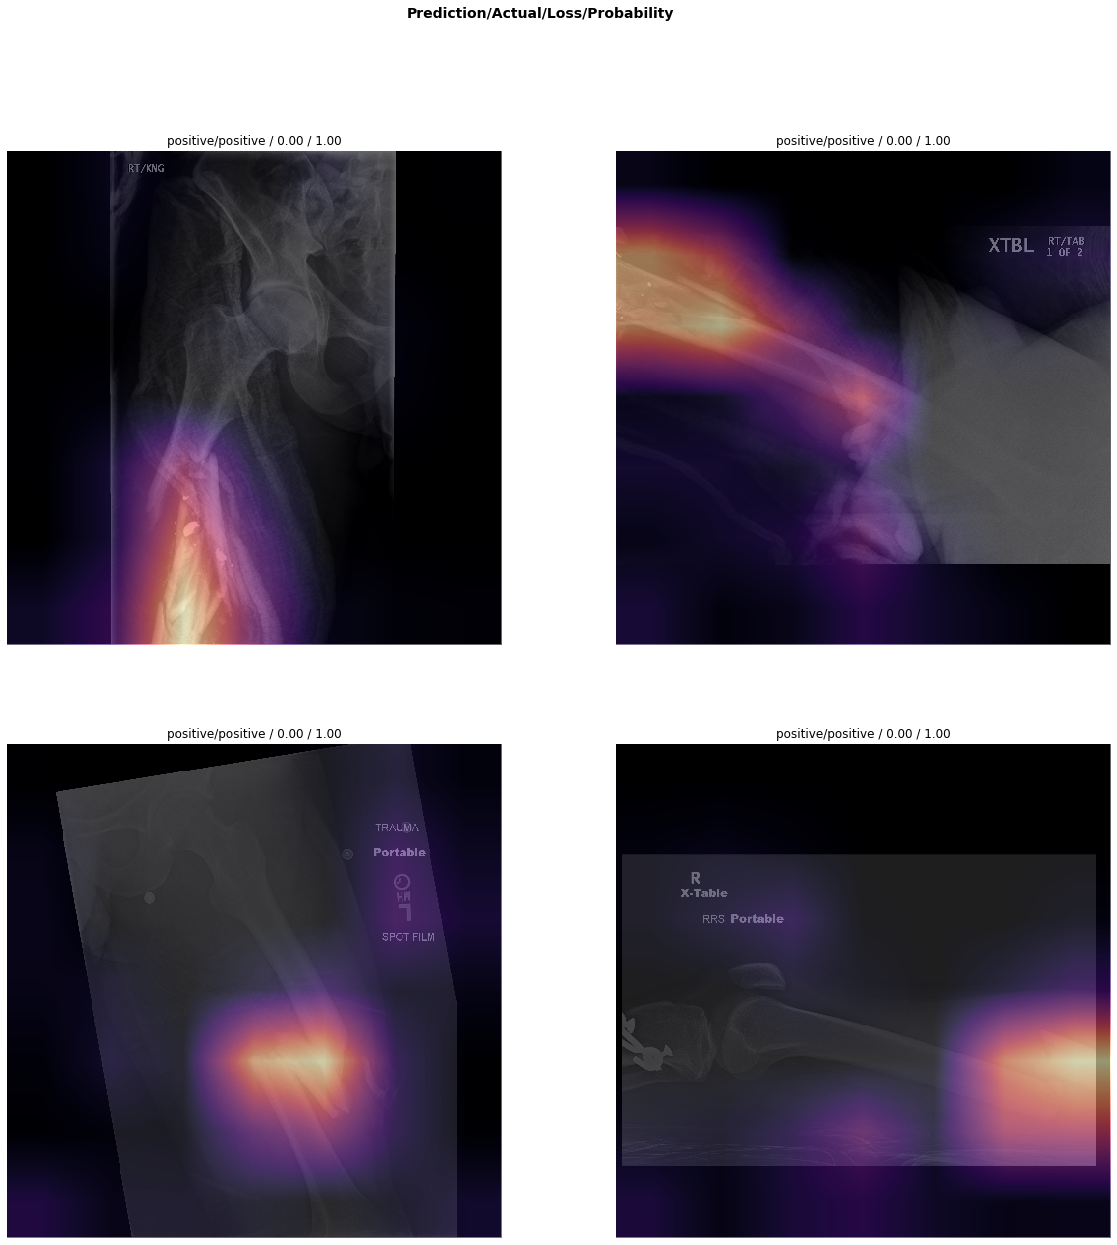

In [13]:
im = interp.plot_top_losses(k=4, heatmap=True, largest=False, return_fig=True, figsize=(20, 20))

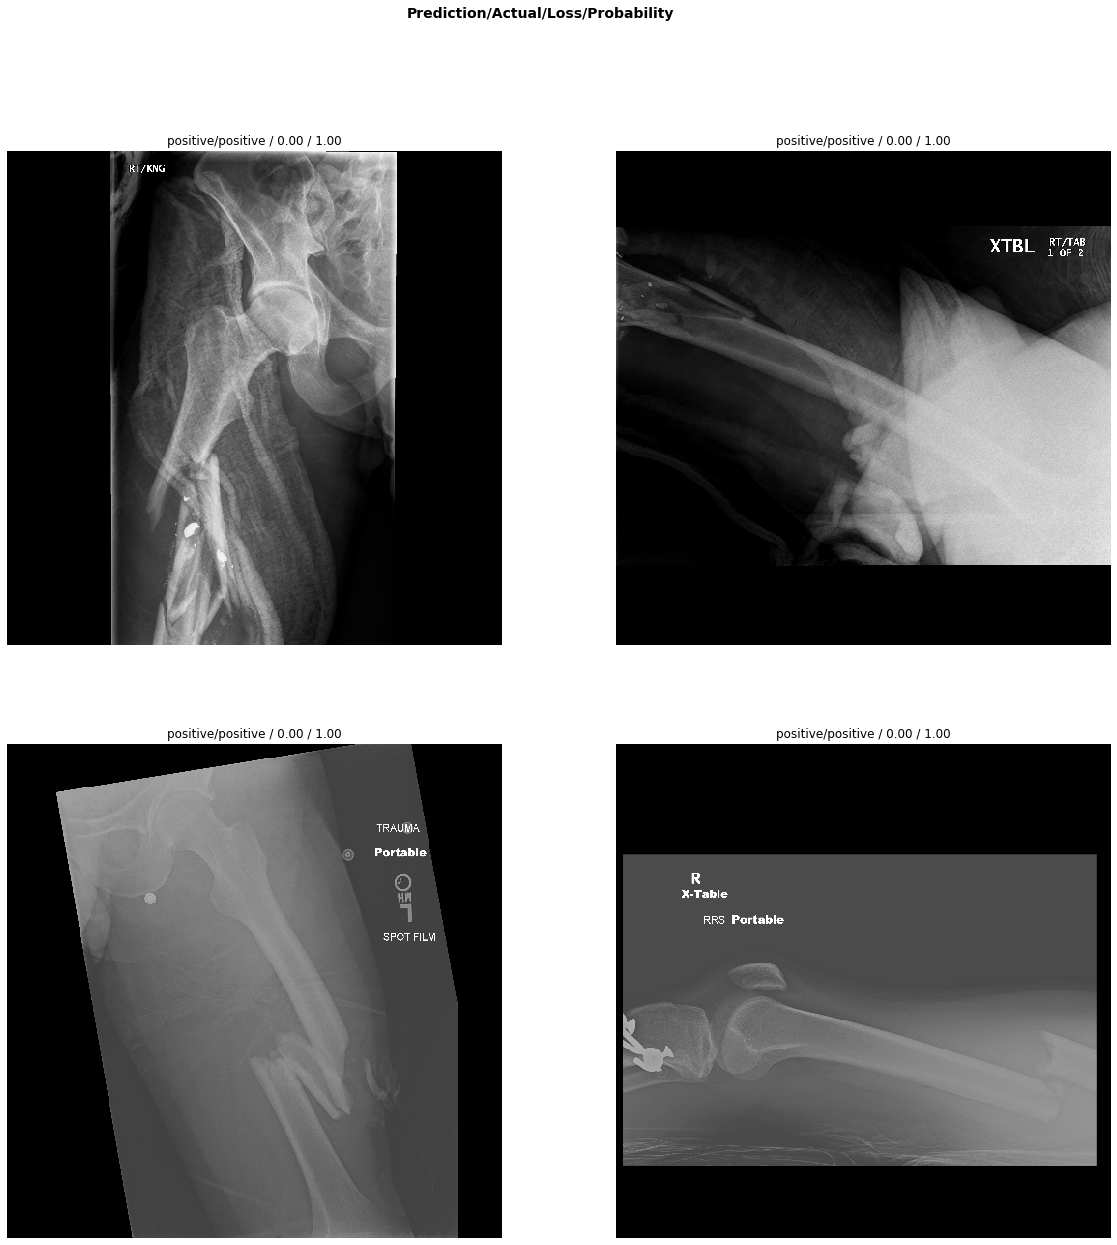

In [14]:
im = interp.plot_top_losses(k=4, heatmap=False, largest=False, return_fig=True, figsize=(20, 20))

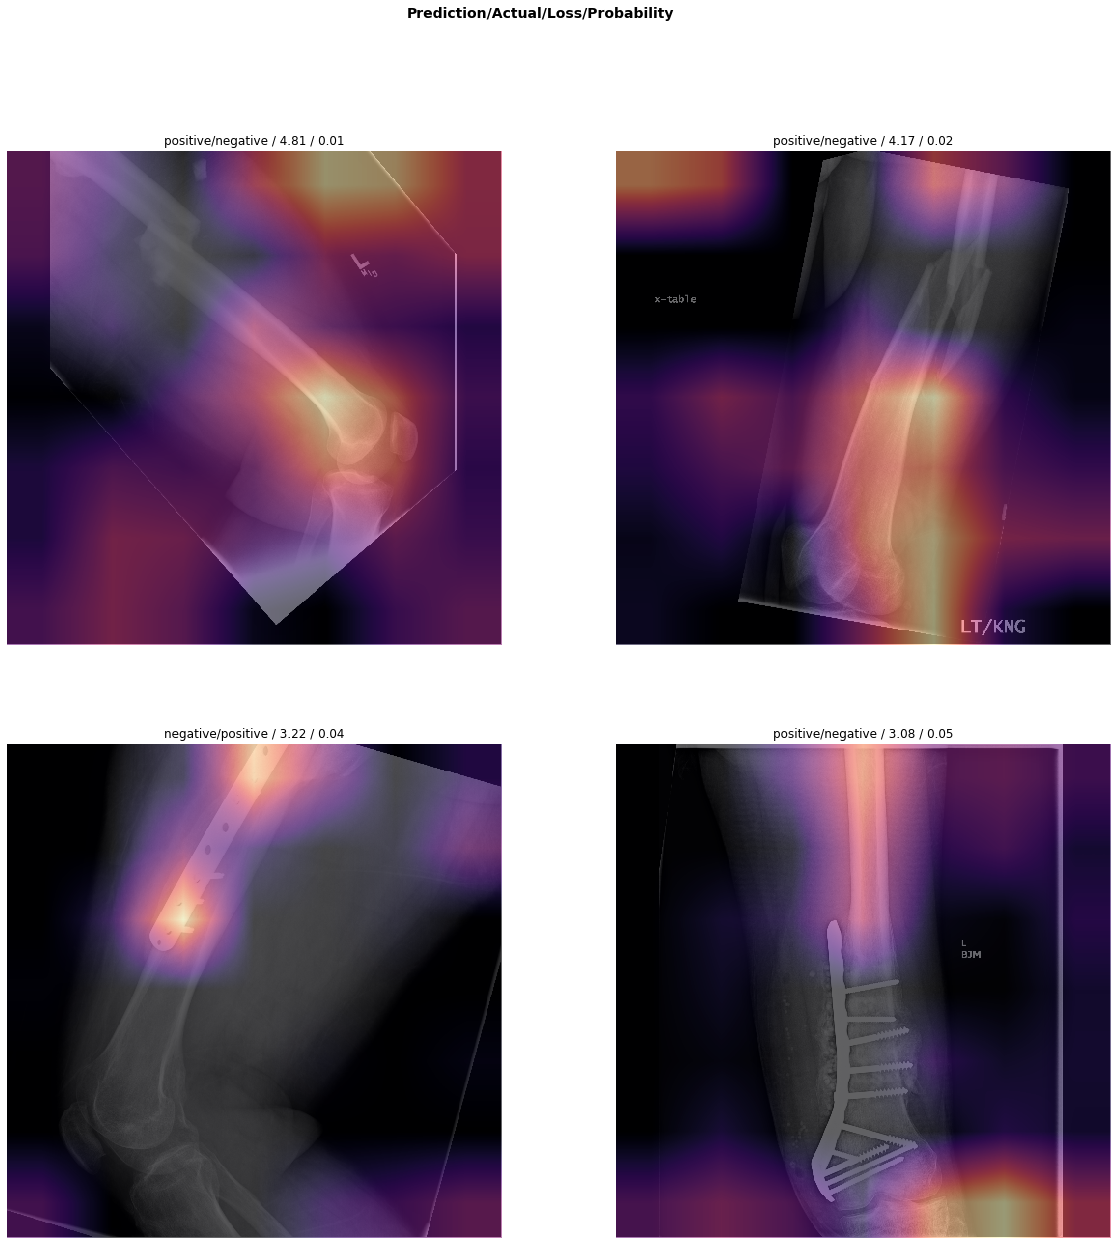

In [15]:
im = interp.plot_top_losses(k=4, heatmap=True, largest=True, return_fig=True, figsize=(20, 20))

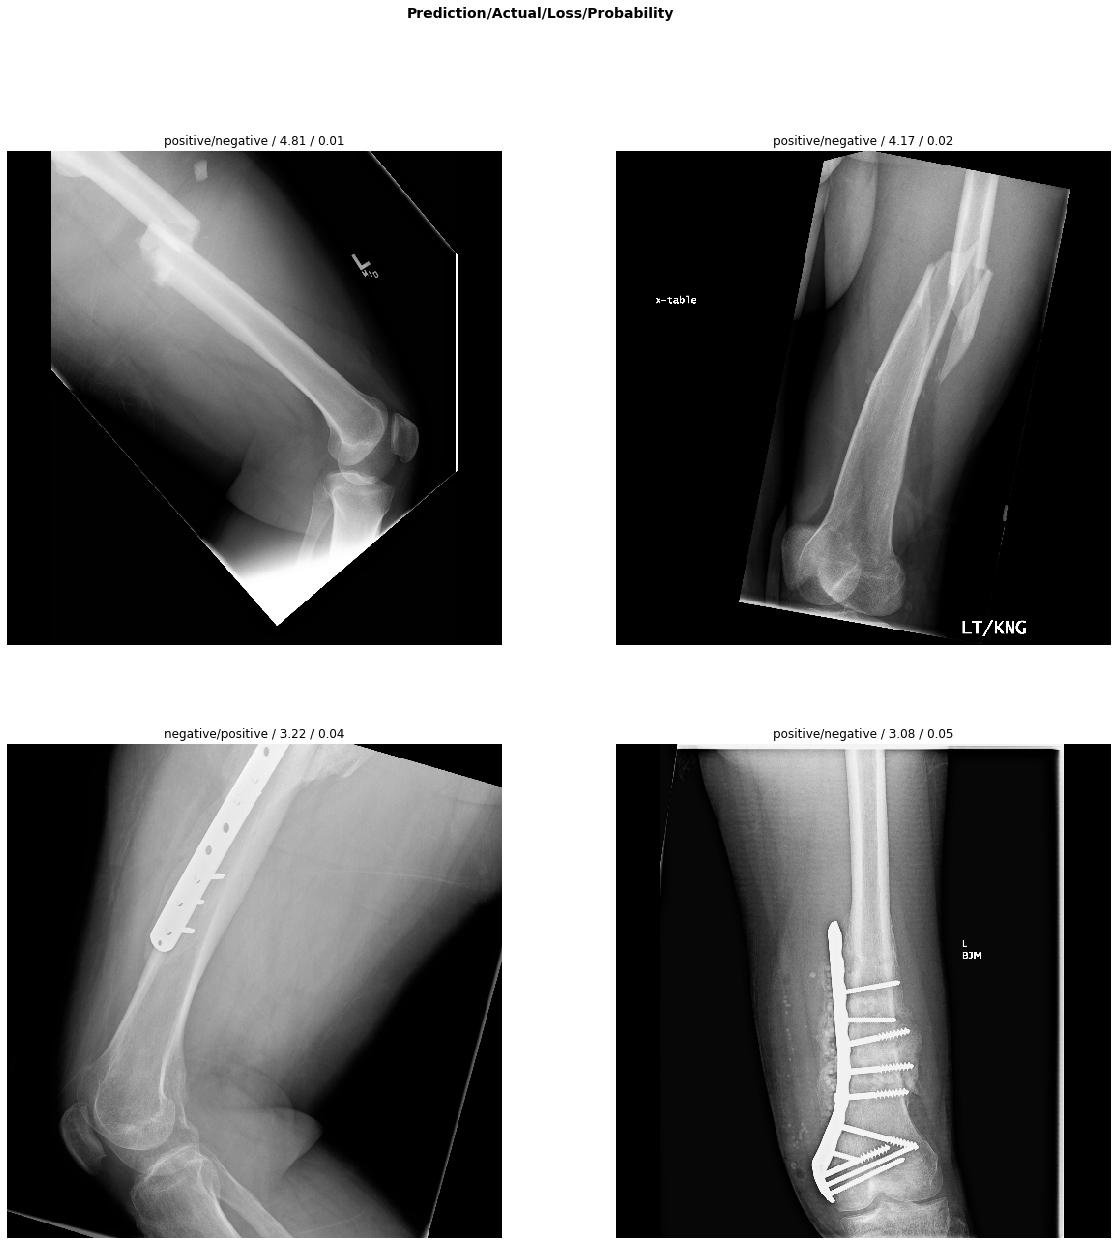

In [16]:
im = interp.plot_top_losses(k=4, heatmap=False, largest=True, return_fig=True, figsize=(20, 20))